#  Parameter Optimization of SVM

Name : Ananya Thomas<BR>
Roll No : 102017024<BR>
Sub Group : CSE 1

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bean = pd.read_excel("/content/Dry_Bean_Dataset.xlsx")

print(df_bean.shape)
print(df_bean.columns)

(13611, 17)
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [3]:
df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
print(df_bean.Class.value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_bean['Class']= label_encoder.fit_transform(df_bean['Class'])

df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [6]:
best_accuracy = 0
acc = []
params = []

In [7]:
for i in range(10):
  sample_df = df_bean.sample(frac=0.40, replace=False)
  X = sample_df.iloc[:, :-1]
  Y = sample_df.iloc[:, -1]
  x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27)
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train_orig)
  x_test = sc.transform(x_test_orig)
  param_grid = { 
                'C':[0.1,1,10,100,1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'degree':[1, 2, 3, 4],
                'kernel':['rbf','sigmoid','poly','linear']
                }
  grid = GridSearchCV(SVC(max_iter=100), param_grid, refit = True)
  grid.fit(x_train, y_train)
  y_pred = grid.predict(x_test)
  acc_score = accuracy_score(y_test, y_pred)
  acc.append(acc_score)
  params.append(grid.best_params_)
  if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df
  print(grid.best_params_)
  print('Sample : {}'.format(i+1))
  print('Accuracy : {}\n'.format(acc_score)) 

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample : 1
Accuracy : 0.8115055079559363

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample : 2
Accuracy : 0.8751529987760098

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample : 3
Accuracy : 0.8763769889840881

{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Sample : 4
Accuracy : 0.8922888616891065

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample : 5
Accuracy : 0.8886168910648715

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample : 6
Accuracy : 0.9069767441860465

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample : 7
Accuracy : 0.8910648714810282

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample : 8
Accuracy : 0.890452876376989

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample : 9
Accuracy : 0.890452876376989

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample : 10
Accuracy : 0.8959608323133414



In [14]:
sample = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']
comparative_df = pd.DataFrame(data=[sample,acc, params], index=['Sample','Best Accuracy', 'Best SVM Parameters']).T
comparative_df

,Sample,Best Accuracy,Best SVM Parameters
0,S1,0.811506,"{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel':..."
1,S2,0.875153,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
2,S3,0.876377,"{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel':..."
3,S4,0.892289,"{'C': 100, 'degree': 1, 'gamma': 0.001, 'kerne..."
4,S5,0.888617,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
5,S6,0.906977,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
6,S7,0.891065,"{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel':..."
7,S8,0.890453,"{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
8,S9,0.890453,"{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel':..."
9,S10,0.895961,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."


In [9]:
print(best_accuracy)
print(best_model)

0.9069767441860465
SVC(C=1, degree=1, gamma=1, max_iter=100)


In [11]:
acc_list = []
iterations = []
X = best_sample_df.iloc[:, :-1]
Y = best_sample_df.iloc[:, -1]
x_train_orig, x_test_orig, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27)
sc = StandardScaler()
x_train = sc.fit_transform(x_train_orig)
x_test = sc.transform(x_test_orig)
for i in range(100):
    x = i+1
    svm = SVC(C=1, degree=1, gamma=1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

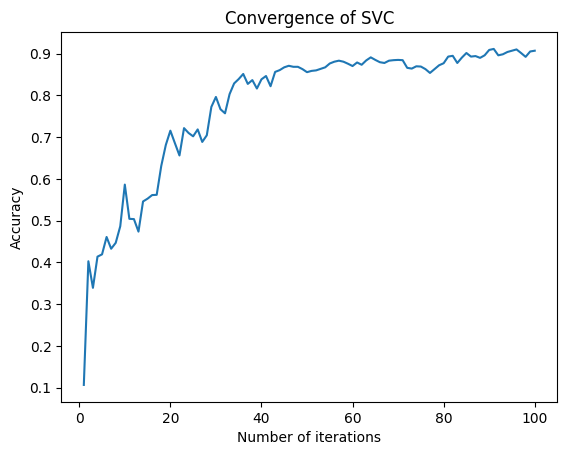

In [12]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()